## Análise dos cursos da Udemy

#### Importando bibliotecas

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

### Lendo a base

In [3]:
data = pd.read_csv(r'C:\Users\user\Desktop\Python Files\Bases Kaggle\udemy_courses.csv')

## Tendo as primeiras impressões dos dados

In [9]:
data.head(10)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance
5,192870,Trading Penny Stocks: A Guide for All Levels I...,https://www.udemy.com/trading-penny-stocks-a-g...,True,150,9221,138,25,All Levels,3 hours,2014-05-02T15:13:30Z,Business Finance
6,739964,Investing And Trading For Beginners: Mastering...,https://www.udemy.com/investing-and-trading-fo...,True,65,1540,178,26,Beginner Level,1 hour,2016-02-21T18:23:12Z,Business Finance
7,403100,"Trading Stock Chart Patterns For Immediate, Ex...",https://www.udemy.com/trading-chart-patterns-f...,True,95,2917,148,23,All Levels,2.5 hours,2015-01-30T22:13:03Z,Business Finance
8,476268,Options Trading 3 : Advanced Stock Profit and ...,https://www.udemy.com/day-trading-stock-option...,True,195,5172,34,38,Expert Level,2.5 hours,2015-05-28T00:14:03Z,Business Finance
9,1167710,The Only Investment Strategy You Need For Your...,https://www.udemy.com/the-only-investment-stra...,True,200,827,14,15,All Levels,1 hour,2017-04-18T18:13:32Z,Business Finance


In [7]:
data.shape

(3683, 12)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 12 columns):
course_id              3683 non-null int64
course_title           3683 non-null object
url                    3683 non-null object
is_paid                3683 non-null object
price                  3683 non-null object
num_subscribers        3683 non-null int64
num_reviews            3683 non-null int64
num_lectures           3683 non-null int64
level                  3683 non-null object
content_duration       3683 non-null object
published_timestamp    3683 non-null object
subject                3683 non-null object
dtypes: int64(4), object(8)
memory usage: 345.4+ KB


## Podemos ver que as funções timestamp, tempo de curso e price não estão no formato adequado... temos que alterar

### Começando pela content_duration

In [55]:
data['content_duration'].unique()

array(['1.5 hours', '39 hours', '2.5 hours', '3 hours', '2 hours',
       '1 hour', '5 hours', '7 hours', '4 hours', '35 mins', '4.5 hours',
       '6.5 hours', '10 hours', '5.5 hours', '7.5 hours', '11.5 hours',
       '16 hours', '3.5 hours', '9 hours', '8.5 hours', '11 hours',
       '42 mins', '9.5 hours', '218 questions', '18 questions', '33 mins',
       '62 hours', '8 mins', '41 mins', '31.5 hours', '20 hours',
       '6 hours', '46.5 hours', '43 mins', '17.5 hours', '12 hours',
       '32 mins', '24 hours', '19.5 hours', '20.5 hours', '30 mins',
       '10.5 hours', '31 mins', '36 mins', '8 hours', '29 hours',
       '26 hours', '24.5 hours', '13 hours', '44 mins', '34 mins',
       '12.5 hours', '19 mins', '37 mins', '40 mins', '18 hours',
       '33 hours', '71.5 hours', '47 hours', '14.5 hours', '39 mins',
       '18.5 hours', '43.5 hours', '38 mins', '14 hours', '28 mins',
       '24 questions', '45 hours', '70 hours', '0', '29.5 hours',
       '82 questions', '13.5 hours',

## Lets filter only data with hours and hour in the dataset

In [57]:
data = data[data['content_duration'].str.contains('hour')]

In [58]:
data.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance


In [60]:
def ajuste_hour(hour):
    hora = hour.replace('hour','')
    hora1 = hora.replace('s','')
    output = float(hora1)
    return output

In [64]:
data['content_duration'] = data['content_duration'].apply(ajuste_hour)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Vamos checar pra ver se o content duration mudou para float

In [72]:
# sim mudou... já alteramos pelo menos um dado
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3351 entries, 0 to 3682
Data columns (total 12 columns):
course_id              3351 non-null int64
course_title           3351 non-null object
url                    3351 non-null object
is_paid                3351 non-null object
price                  3351 non-null object
num_subscribers        3351 non-null int64
num_reviews            3351 non-null int64
num_lectures           3351 non-null int64
level                  3351 non-null object
content_duration       3351 non-null float64
published_timestamp    3351 non-null object
subject                3351 non-null object
dtypes: float64(1), int64(4), object(7)
memory usage: 340.3+ KB


## Agora temos que limpar o price

In [75]:
data['price'].unique()

array(['200', '75', '45', '95', '150', '65', '195', '30', '20', '50',
       '175', '140', '115', '190', '125', '60', '145', '105', '155',
       '185', '180', '120', '25', '160', '40', '100', 'Free', '90', '35',
       '80', '70', '55', '165', '130', '85', '170', '110', '135'],
      dtype=object)

## Nós temos cursos gratuitos

In [77]:
def free_course(course):
    price = course.replace('Free','0')
    price1 = float(price)
    return price1

In [79]:
data['price'] = data['price'].apply(free_course)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3351 entries, 0 to 3682
Data columns (total 12 columns):
course_id              3351 non-null int64
course_title           3351 non-null object
url                    3351 non-null object
is_paid                3351 non-null object
price                  3351 non-null float64
num_subscribers        3351 non-null int64
num_reviews            3351 non-null int64
num_lectures           3351 non-null int64
level                  3351 non-null object
content_duration       3351 non-null float64
published_timestamp    3351 non-null object
subject                3351 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 340.3+ KB


## Temos que ajeitar a timestamp

In [129]:
data['published_timestamp']= pd.to_datetime(data['published_timestamp'], format = '%Y-%m-%dT%H:%M:%SZ')

In [130]:
data.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200.0,2147,23,51,All Levels,1.5,2017-01-18 20:58:58,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75.0,2792,923,274,All Levels,39.0,2017-03-09 16:34:20,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45.0,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95.0,2451,11,36,All Levels,3.0,2017-05-30 20:07:24,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200.0,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18,Business Finance


In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3351 entries, 0 to 3682
Data columns (total 12 columns):
course_id              3351 non-null int64
course_title           3351 non-null object
url                    3351 non-null object
is_paid                3351 non-null object
price                  3351 non-null float64
num_subscribers        3351 non-null int64
num_reviews            3351 non-null int64
num_lectures           3351 non-null int64
level                  3351 non-null object
content_duration       3351 non-null float64
published_timestamp    3351 non-null datetime64[ns]
subject                3351 non-null object
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 340.3+ KB


## separando somente para data

In [138]:
data['date'] = pd.to_datetime(data['published_timestamp'].dt.date, format = '%Y-%m-%d')

In [140]:
data.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,date
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200.0,2147,23,51,All Levels,1.5,2017-01-18 20:58:58,Business Finance,2017-01-18
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75.0,2792,923,274,All Levels,39.0,2017-03-09 16:34:20,Business Finance,2017-03-09
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45.0,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30,Business Finance,2016-12-19
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95.0,2451,11,36,All Levels,3.0,2017-05-30 20:07:24,Business Finance,2017-05-30
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200.0,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18,Business Finance,2016-12-13


In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3351 entries, 0 to 3682
Data columns (total 13 columns):
course_id              3351 non-null int64
course_title           3351 non-null object
url                    3351 non-null object
is_paid                3351 non-null object
price                  3351 non-null float64
num_subscribers        3351 non-null int64
num_reviews            3351 non-null int64
num_lectures           3351 non-null int64
level                  3351 non-null object
content_duration       3351 non-null float64
published_timestamp    3351 non-null datetime64[ns]
subject                3351 non-null object
date                   3351 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(4), object(5)
memory usage: 526.5+ KB


## Agora que limpamos os dados vamos visualizar os dados

In [142]:
# Vamos explorar os dados categóricos
categorical = [var for var in data.columns if data[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)


There are 5 categorical variables

The categorical variables are :

 ['course_title', 'url', 'is_paid', 'level', 'subject']


In [144]:
data['is_paid'].unique(), data['level'].unique(), data['subject'].unique()

(array(['True', 'False', 'TRUE', 'FALSE'], dtype=object),
 array(['All Levels', 'Intermediate Level', 'Beginner Level',
        'Expert Level'], dtype=object),
 array(['Business Finance', 'Graphic Design', 'Musical Instruments',
        'Web Development'], dtype=object))

## Nos conseguimos ver que temos dados em maiusculo e outros em minúsculo, temos que transforma-los td em uma forma

In [145]:
## usando funçao replace
data['is_paid'] = data['is_paid'].replace({'TRUE': 'True', 'FALSE':'False'})

In [146]:
data['is_paid'].unique()

array(['True', 'False'], dtype=object)

## Now that we finally changed this erros lets now plot some views

In [147]:
# so we have 3 categorical data, we can explore these data here
# view the frequency 
for var in categorical:
    print(data[var].value_counts()/np.float(len(data)))

Creating an animated greeting card via Google Slides           0.000895
Acoustic Blues Guitar Lessons                                  0.000895
Drum Lessons For Beginners                                     0.000597
Understanding Financial Statements                             0.000597
Introduction to Forex Trading Business For Beginners           0.000597
                                                                 ...   
Bootstrap Essential Training - Create Your Very Own Website    0.000298
Hedge Fund Trading System                                      0.000298
JQuery Essentials core training for Dynamic Interactive web    0.000298
Build Powerful Websites & Blogs using WordPress - No Coding    0.000298
The Complete PHP CodeIgniter Course: Beginner To Advanced      0.000298
Name: course_title, Length: 3339, dtype: float64
https://www.udemy.com/build-beautiful-html5-website/                           0.000597
https://www.udemy.com/understanding-financial-statements/              

##  Lets visualize some data

Text(0.5, 0, 'Paid')

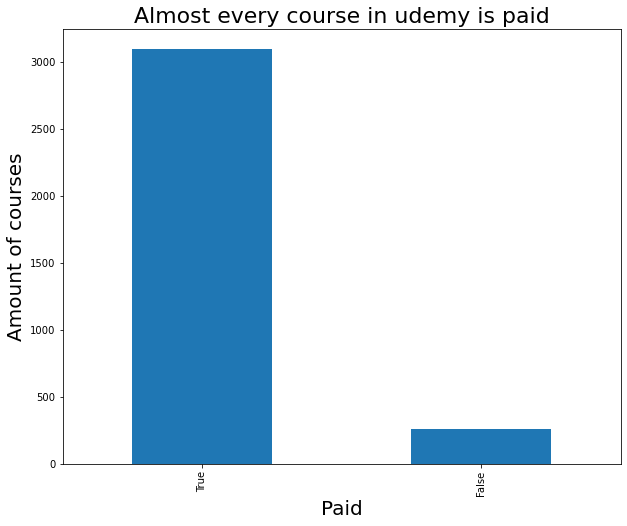

In [150]:
ax = data['is_paid'].value_counts().plot(kind ='bar',
                                        figsize = (10,8))

ax.set_title('Almost every course in udemy is paid', fontsize = 22)
ax.set_ylabel('Amount of courses', fontsize = 20)
ax.set_xlabel('Paid', fontsize = 20)

Text(0.5, 0, 'Courses')

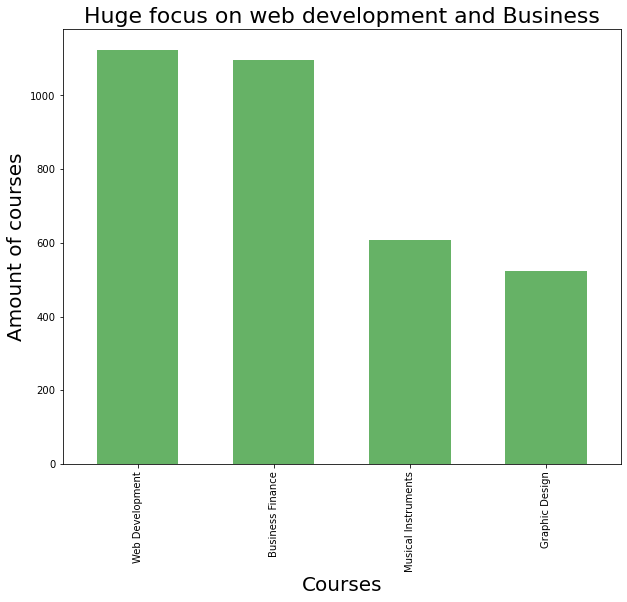

In [163]:
ax = data['subject'].value_counts().plot(kind ='bar',
                                        figsize = (10,8),
                                        color = 'g',
                                        width = 0.6,
                                        alpha = 0.6)

ax.set_title('Huge focus on web development and Business', fontsize = 22)
ax.set_ylabel('Amount of courses', fontsize = 20)
ax.set_xlabel('Courses', fontsize = 20)

Text(0.5, 0, 'Levels')

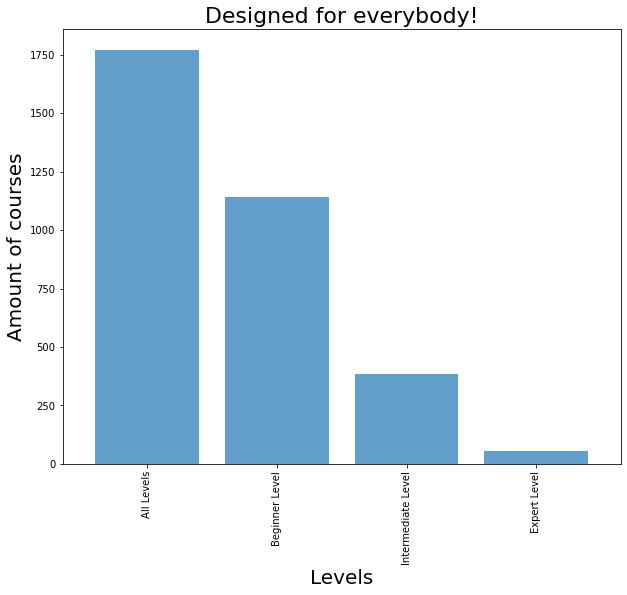

In [164]:
ax = data['level'].value_counts().plot(kind ='bar',
                                        figsize = (10,8),
                                      width = 0.8,
                                      alpha= 0.7)

ax.set_title('Designed for everybody!', fontsize = 22)
ax.set_ylabel('Amount of courses', fontsize = 20)
ax.set_xlabel('Levels', fontsize = 20)

## Understanding how is the levels and subjects are divided in the dataset

In [171]:
grouped = data.groupby(['level','subject'])

In [172]:
grouped_pct = grouped['course_id']

In [184]:
grouped_pct.agg('describe')

count          mean            std  \
level              subject                                                   
All Levels         Business Finance     646.0  6.132193e+05  329644.995549   
                   Graphic Design       264.0  6.635699e+05  358546.765585   
                   Musical Instruments  244.0  6.198327e+05  353114.659857   
                   Web Development      618.0  6.662010e+05  323797.209409   
Beginner Level     Business Finance     307.0  6.651997e+05  362950.118138   
                   Graphic Design       209.0  7.556473e+05  328631.885940   
                   Musical Instruments  263.0  6.347744e+05  331723.497354   
                   Web Development      361.0  7.258280e+05  347723.609645   
Expert Level       Business Finance      27.0  5.496390e+05  411551.681290   
                   Graphic Design         5.0  1.165032e+06  127759.626818   
                   Musical Instruments    7.0  5.745406e+05  466927.509664   
                   Web Development       15.0  8.068921e+05  353105.328939   
Intermediate Level Business Finance     116.0  6.825059e+05  388797.243126   
                   Graphic Design        45.0  7.585859e+05  339020.581807   
                   Musical Instruments   94.0  6.346808e+05  360903.760327   
                   Web Development      130.0  7.872056e+05  312152.402198   

                                             min        25%        50%  \
level              subject                                               
All Levels         Business Finance      20185.0   358775.5   593711.0   
                   Graphic Design        15467.0   399440.0   628613.0   
                   Musical Instruments   12214.0   234170.0   656941.0   
                   Web Development        8324.0   433031.5   677348.0   
Beginner Level     Business Finance      19653.0   361665.0   688244.0   
                   Graphic Design        37821.0   518188.0   766320.0   
                   Musical Instruments   19421.0   392475.0   644820.0   
                   Web Development       12975.0   482834.0   778226.0   
Expert Level       Business Finance      42640.0   133504.0   476268.0   
                   Graphic Design       981684.0  1080584.0  1242692.0   
                   Musical Instruments   90132.0   101502.0   681692.0   
                   Web Development      212394.0   601739.0   708514.0   
Intermediate Level Business Finance      24815.0   363073.0   703076.0   
                   Graphic Design       117004.0   553832.0   742392.0   
                   Musical Instruments   64585.0   232508.0   743654.0   
                   Web Development       17887.0   569460.0   867916.0   

                                              75%        max  
level              subject                                    
All Levels         Business Finance      867407.5  1276364.0  
                   Graphic Design        962382.5  1275872.0  
                   Musical Instruments   923562.0  1261210.0  
                   Web Development       928976.5  1277924.0  
Beginner Level     Business Finance      955295.0  1282064.0  
                   Graphic Design       1046722.0  1276020.0  
                   Musical Instruments   840567.0  1266892.0  
                   Web Development      1013380.0  1274210.0  
Expert Level       Business Finance      876550.0  1275790.0  
                   Graphic Design       1245356.0  1274846.0  
                   Musical Instruments   950334.0  1146288.0  
                   Web Development      1125082.0  1270222.0  
Intermediate Level Business Finance     1013352.0  1276182.0  
                   Graphic Design       1076222.0  1266468.0  
                   Musical Instruments   923922.0  1253224.0  
                   Web Development      1008122.5  1256136.0

## Legal, ao observar este codigo é possível observar que dentre os assuntos de cursos dentre todos os leveis, business finance e web development são os mais criados

## Vamos explorar agora os dados numericos 

In [185]:
# now we are going to explore numerical data.
numerical = [var for var in data.columns if data[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 8 numerical variables

The numerical variables are : ['course_id', 'price', 'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration', 'published_timestamp', 'date']


In [189]:
data.corr().round(4)

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
course_id,1.0000,0.1590,-0.1665,-0.0570,-0.0105,-0.0459
price,0.1590,1.0000,0.0478,0.1138,0.3180,0.2797
num_subscribers,-0.1665,0.0478,1.0000,0.6500,0.1516,0.1554
num_reviews,-0.0570,0.1138,0.6500,1.0000,0.2412,0.2264
num_lectures,-0.0105,0.3180,0.1516,0.2412,1.0000,0.7960
content_duration,-0.0459,0.2797,0.1554,0.2264,0.7960,1.0000


## Checando nossa variável dependente

Text(0.5, 1.0, 'Preço dos cursos')

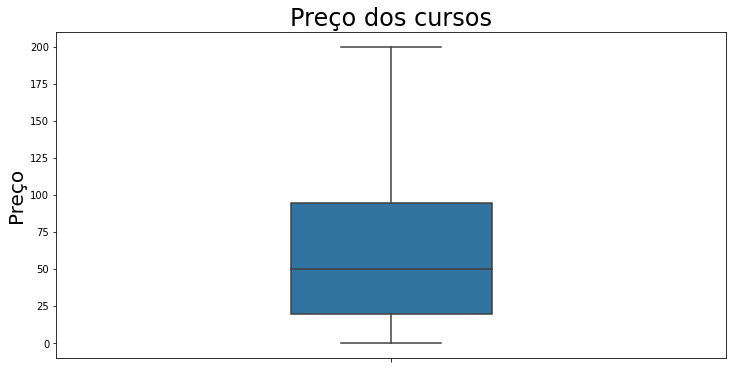

In [200]:
ax = sns.boxplot(data['price'], orient = 'v', width = 0.3)
ax.figure.set_size_inches(12,6)
ax.set_ylabel('Preço', fontsize = 20)
ax.set_title('Preço dos cursos', fontsize  = 24)

## Não parece uma curva normal 

Text(0.5, 1.0, 'Distribuição dos preços do números')

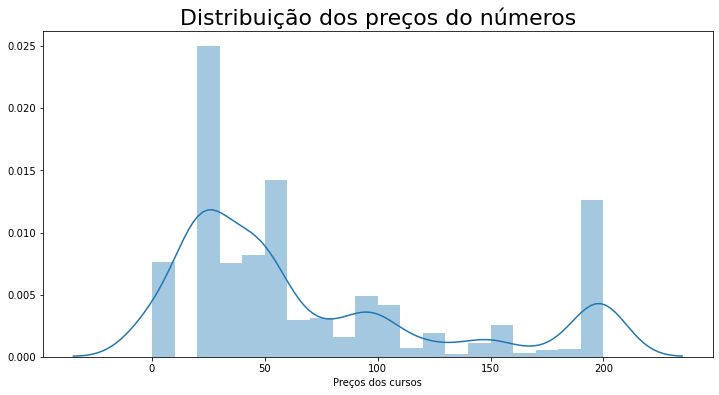

In [205]:
ax = sns.distplot(data['price'])
ax.figure.set_size_inches(12,6)
ax.set_xlabel('Preços dos cursos')
ax.set_title('Distribuição dos preços do números', fontsize = 22)

## Verificando o box plot do preço com outras variáveis

Text(0.5, 0, 'Level')

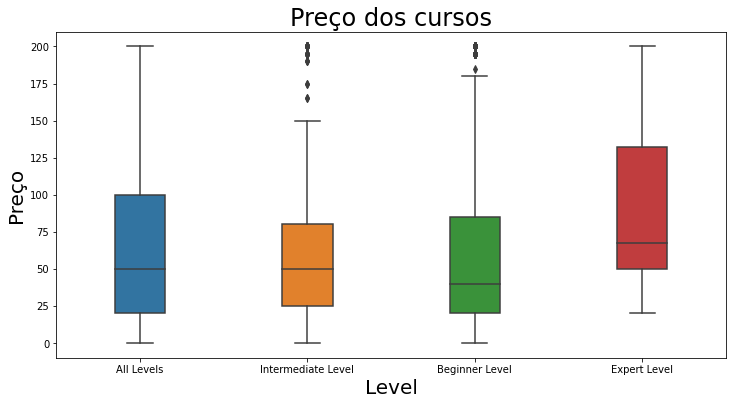

In [207]:
ax = sns.boxplot(x = 'level',y = 'price', data = data, orient = 'v', width = 0.3)
ax.figure.set_size_inches(12,6)
ax.set_ylabel('Preço', fontsize = 20)
ax.set_title('Preço dos cursos', fontsize  = 24)
ax.set_xlabel('Level', fontsize= 20)

Text(0.5, 0, 'Subjects')

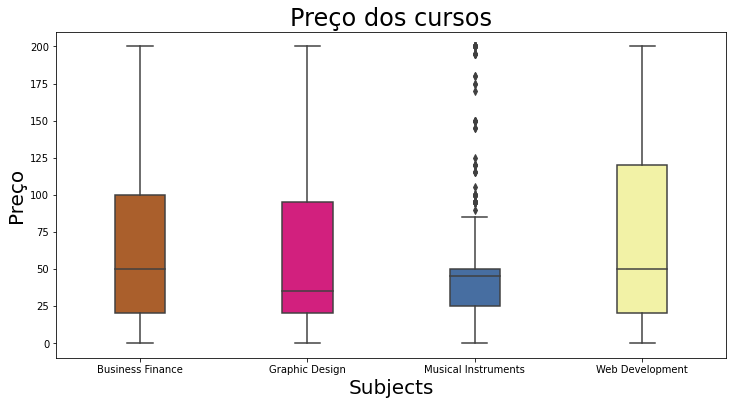

In [210]:
ax = sns.boxplot(x = 'subject',y = 'price', data = data, orient = 'v', width = 0.3)
ax.figure.set_size_inches(12,6)
sns.set_palette('CMRmap')
ax.set_ylabel('Preço', fontsize = 20)
ax.set_title('Preço dos cursos', fontsize  = 24)
ax.set_xlabel('Subjects', fontsize= 20)

## Tanto no boxplot do assuntos e leveis temos uma assimetria pra direita bem forte

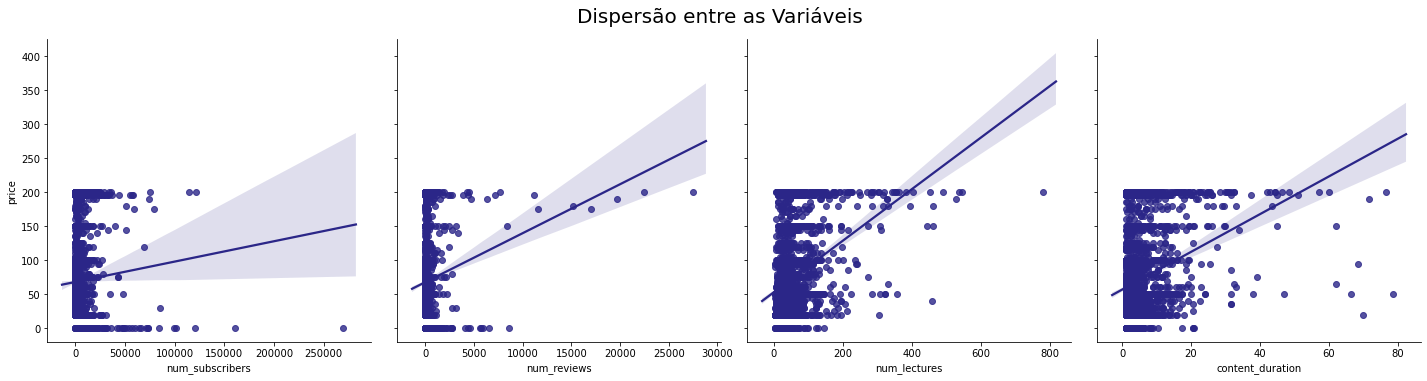

In [213]:
ax = sns.pairplot(data, y_vars = 'price', x_vars = ['num_subscribers', 'num_reviews', 'num_lectures','content_duration'], height = 5, kind = 'reg')
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

## Transformando os valores para logaritmo

In [214]:
data.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.351000e+03,3351.000000,3351.000000,3351.000000,3351.000000,3351.000000
mean,6.677064e+05,68.934646,3361.252164,166.861534,42.899731,4.434646
std,3.449397e+05,61.854419,9891.266437,978.439416,51.891179,6.238917
min,8.324000e+03,0.000000,0.000000,0.000000,5.000000,1.000000
25%,3.986600e+05,20.000000,119.000000,5.000000,17.000000,1.500000
50%,6.746080e+05,50.000000,944.000000,19.000000,27.000000,2.500000
75%,9.534660e+05,95.000000,2671.000000,72.000000,49.000000,5.000000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


In [219]:
# +1 pq os valor de dist praia e dist farmacia tem valores = 0 log(0) = - inf
data['log_price'] = np.log(data['price']+1)
data['log_num_subscribers'] = np.log(data['num_subscribers'])
data['log_num_reviews'] = np.log(data['num_reviews'] + 1)
data['log_num_lectures'] = np.log(data['num_lectures'])
data['log_content_duration'] = np.log(data['content_duration'])

In [220]:
data.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,date,log_price,log_num_subscribers,log_num_reviews,log_num_lectures,log_content_duration
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200.0,2147,23,51,All Levels,1.5,2017-01-18 20:58:58,Business Finance,2017-01-18,5.303305,7.671827,3.178054,3.931826,0.405465
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75.0,2792,923,274,All Levels,39.0,2017-03-09 16:34:20,Business Finance,2017-03-09,4.330733,7.934513,6.828712,5.613128,3.663562
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45.0,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30,Business Finance,2016-12-19,3.828641,7.684324,4.317488,3.931826,0.916291
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95.0,2451,11,36,All Levels,3.0,2017-05-30 20:07:24,Business Finance,2017-05-30,4.564348,7.804251,2.484907,3.583519,1.098612
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200.0,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18,Business Finance,2016-12-13,5.303305,7.151485,3.828641,3.258097,0.693147


In [226]:
data_new = data[data['is_paid'] == 'True']

In [227]:
data_new.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,date,log_price,log_num_subscribers,log_num_reviews,log_num_lectures,log_content_duration
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200.0,2147,23,51,All Levels,1.5,2017-01-18 20:58:58,Business Finance,2017-01-18,5.303305,7.671827,3.178054,3.931826,0.405465
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75.0,2792,923,274,All Levels,39.0,2017-03-09 16:34:20,Business Finance,2017-03-09,4.330733,7.934513,6.828712,5.613128,3.663562
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45.0,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30,Business Finance,2016-12-19,3.828641,7.684324,4.317488,3.931826,0.916291
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95.0,2451,11,36,All Levels,3.0,2017-05-30 20:07:24,Business Finance,2017-05-30,4.564348,7.804251,2.484907,3.583519,1.098612
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200.0,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18,Business Finance,2016-12-13,5.303305,7.151485,3.828641,3.258097,0.693147


Text(0.5, 1.0, 'Distribuição dos preços do números')

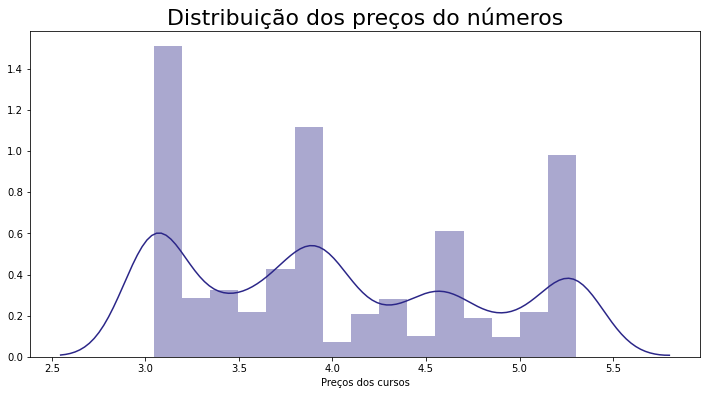

In [234]:
ax = sns.distplot(data_new['log_price'], bins =15)
ax.figure.set_size_inches(12,6)
ax.set_xlabel('Preços dos cursos')
ax.set_title('Distribuição dos preços do números', fontsize = 22)

## Ainda não está bom... let's try removing outliers.. lets start with removing outliers from subjects

In [243]:
group_subject = data_new.groupby('subject')['price']

In [244]:
type(group_subject)

pandas.core.groupby.generic.SeriesGroupBy

In [245]:
group_subject.groups

{'Business Finance': Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
             ...
             1185, 1186, 1188, 1190, 1191, 1193, 1194, 1195, 1197, 1198],
            dtype='int64', length=1012),
 'Graphic Design': Int64Index([1199, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208,
             ...
             1789, 1791, 1792, 1793, 1794, 1795, 1797, 1798, 1799, 1800],
            dtype='int64', length=498),
 'Musical Instruments': Int64Index([1804, 1805, 1808, 1809, 1810, 1811, 1812, 1814, 1815, 1817,
             ...
             2472, 2473, 2474, 2475, 2477, 2478, 2479, 2480, 2481, 2482],
            dtype='int64', length=573),
 'Web Development': Int64Index([2483, 2484, 2485, 2486, 2487, 2488, 2489, 2490, 2491, 2492,
             ...
             3669, 3674, 3675, 3676, 3677, 3678, 3679, 3680, 3681, 3682],
            dtype='int64', length=1011)}

In [246]:
group_subject.mean()

subject
Business Finance       76.521739
Graphic Design         64.457831
Musical Instruments    54.633508
Web Development        89.174085
Name: price, dtype: float64

In [248]:
Q1 = group_subject.quantile(.25)
Q3 = group_subject.quantile(.75)
IIQ = Q3 - Q1 #intervalo interquartilico
limite_inferior = Q1 - 1.5*IIQ
limite_superior = Q3 + 1.5*IIQ

In [249]:
Q1

subject
Business Finance       20.0
Graphic Design         20.0
Musical Instruments    30.0
Web Development        35.0
Name: price, dtype: float64

In [250]:
limite_inferior

subject
Business Finance      -107.5
Graphic Design         -92.5
Musical Instruments     -7.5
Web Development       -130.0
Name: price, dtype: float64

In [251]:
Q3

subject
Business Finance       105.0
Graphic Design          95.0
Musical Instruments     55.0
Web Development        145.0
Name: price, dtype: float64

In [253]:
IIQ

subject
Business Finance        85.0
Graphic Design          75.0
Musical Instruments     25.0
Web Development        110.0
Name: price, dtype: float64

In [263]:
data_new1 = pd.DataFrame()

for subject in group_subject.groups.keys():
    eh_tipo = data_new['subject'] == subject
    eh_dentro_limite = (data_new['price'] >= limite_inferior[subject]) & (data_new['price'] <= limite_superior[subject])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = data_new[selecao]
    data_new1 = pd.concat([data_new1, dados_selecao])

## Plotando denovo para ver se retiraram os outliers

Text(0.5, 0, 'Subjects')

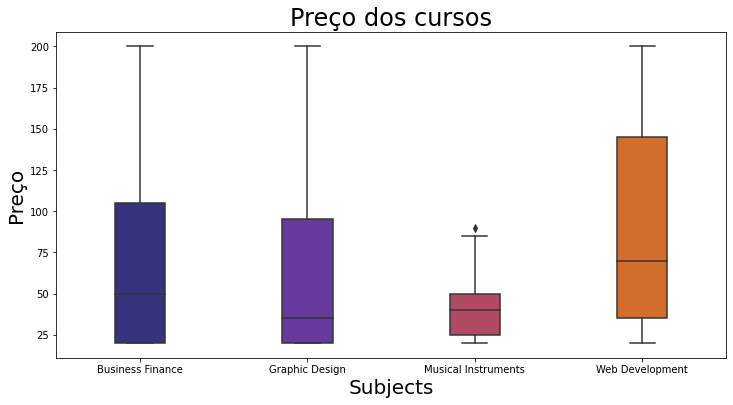

In [265]:
ax = sns.boxplot(x = 'subject',y = 'price', data = data_new1, orient = 'v', width = 0.3)
ax.figure.set_size_inches(12,6)
sns.set_palette('CMRmap')
ax.set_ylabel('Preço', fontsize = 20)
ax.set_title('Preço dos cursos', fontsize  = 24)
ax.set_xlabel('Subjects', fontsize= 20)

## Plotando o histograma

Text(0.5, 1.0, 'Distribuição dos preços do números')

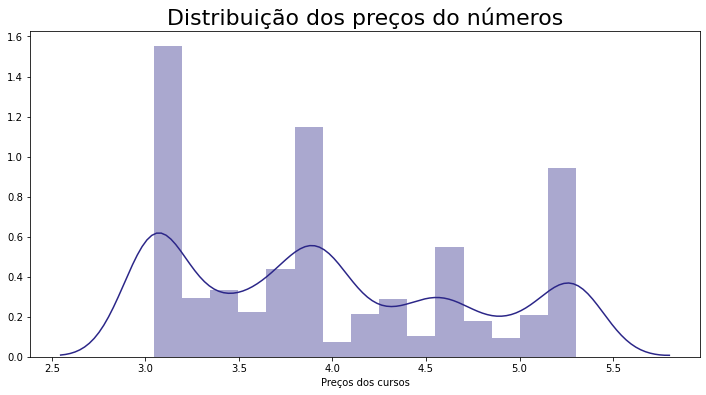

In [268]:
ax = sns.distplot(data_new1['log_price'], bins =15)
ax.figure.set_size_inches(12,6)
ax.set_xlabel('Preços dos cursos')
ax.set_title('Distribuição dos preços do números', fontsize = 22)

## They dont represent a normal distribuition, i dont know what to do with these data